In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [67]:
df = pd.read_csv('data/show_no_show_ready_to_model.csv')

In [68]:
df

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Gender_M,AppointmentDay_DOW,AppointmentDay_Day_number,AppointmentDay_month,Difference_Days_App_Date_and_Sched_Day
0,62,0,1,0,0,0,0,0,0,0,29,0,0
1,56,0,0,0,0,0,0,0,1,0,29,0,0
2,62,0,0,0,0,0,0,0,0,0,29,0,0
3,8,0,0,0,0,0,0,0,0,0,29,0,0
4,56,0,1,1,0,0,0,0,0,0,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106485,56,0,0,0,0,0,1,0,0,4,7,1,34
106486,51,0,0,0,0,0,1,0,0,4,7,1,34
106487,21,0,0,0,0,0,1,0,0,4,7,1,40
106488,38,0,0,0,0,0,1,0,0,4,7,1,40


## SMOTE oversampling

In [69]:
X = df.drop('No-show',axis=1,inplace=False)
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
counter = Counter(y)
print(counter)

Counter({0: 84931, 1: 21559})


In [71]:
# transform the dataset
oversample = SMOTE()
res_X, res_y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(res_y)
print(counter)


Counter({0: 84931, 1: 84931})


## Testing over LR

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:

X_train, X_test, y_train, y_test= train_test_split(res_X,res_y, test_size=0.33, random_state= 69)

In [62]:
model= LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6347149120880087

In [63]:

model.score(X_test, y_test)

0.6381054321648381

In [54]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

In [55]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator

/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Accuracy Score : 0.6372669699402372
Precision Score : 0.6292503346720214
Recall Score : 0.6701357949887728
F1 Score : 0.6490498299877453


/usr/local/Cellar/jupyterlab/2.1.3/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[16920, 11078],
       [ 9255, 18802]])

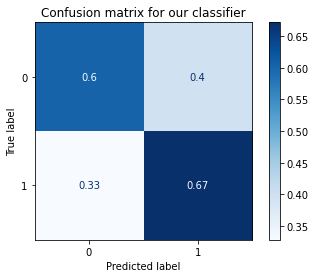

In [65]:
# Generate confusion matrix
matrix = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

## Testing over SVM

In [72]:
X_train, X_test, y_train, y_test= train_test_split(res_X,res_y, test_size=0.33, random_state= 69)

In [73]:
clf = SVC(kernel='sigmoid')
clf = clf.fit(X_train, y_train)

In [74]:
predictions = clf.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[15512 12486]
 [12546 15511]]
              precision    recall  f1-score   support

           0       0.55      0.55      0.55     27998
           1       0.55      0.55      0.55     28057

    accuracy                           0.55     56055
   macro avg       0.55      0.55      0.55     56055
weighted avg       0.55      0.55      0.55     56055



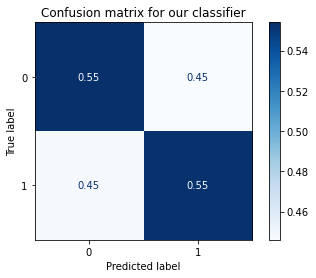

In [77]:
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()